# <center>Assingment 6.12</center> 
                                                           Arul Joy
                                                             2024
                                                       
##   <center>Question</center>                                                       

                                  Design the quantum walk operator for the case of a line with 16 nodes
       

 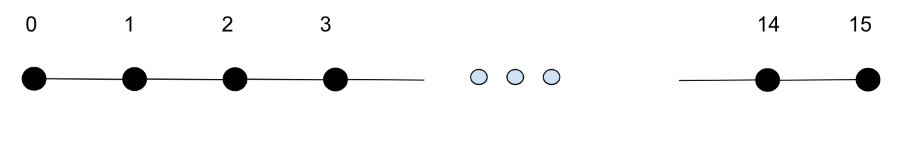
              <center>This image is given in wommanium assignment 6.12</center>
              

##  <center>Answer</center>
    
  

We are asked to build a Quantum walk algorithm for a line with 16 nodes. Quantum walk is the quantum analogue of Classical Random walk. so let us learn a bit about classical random walk first

### Classical Random Walk
It is a Stochastic process in which a particle called "the walker" is jumping either to left or right(if its in a line) depending on the outcomes of a probability system termed "the coin" with atleast two mutually exclusive results. Random walks are useful in other form of graphs also

### Quantum Walk
It is the quantum analogue of the classical random walk and the quantum advantage over classical algorithms can be observed for specific problems using quantum walks. There are two types of quantum walks - Discrete Quantum walk and Continuous Quantum walk.Here we are building a discrete quantum walk algorithm. So the time steps involved are discrete. we need a "coin flip operator" as well as a "swap operator". Grover diffusion operator is used as coin flip operator.

Now let us see the code

 

In [68]:
from classiq import *
# there are 16 nodes or vertices in given graph, so 4 qubits needed to represent them as 2^4 = 16
size = 4 
# we have given functions in inverted order, the main function is given at last.
@qfunc
def prepare_minus(x: QBit):# preparing a qubit in minus state
    X(x)
    H(x)


@qfunc
# performs bitwise XOR operation between the auxillary qubit and evaluation of condition "x!=0"
def diffuzer_oracle(aux: Output[QNum],x:QNum): 
    aux^=(x!=0)


@qfunc
# allocate 1 qubit to aux and calls prepare_minus and diffuze_ oracle functions
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)


#Prepares probability distribution for adjacent vertices for each of the 16 vertices
#And also calls the zero_diffuzer function on adjacent vertices
def coin_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    if i==0:
        prob[(i+1)% 16]=1
    elif i==15:
        prob[(i-1)% 16]=1
    else:
        prob[(i+1)% 16]=0.5
        prob[(i-1)% 16]=0.5
    print(f'State={i}, prob vec ={prob}')
    
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))


@qfunc 
# calls the coin_iteration function 16 times for each vertices
def coin_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(2**size):
        coin_iteration(i,vertices,adjacent_vertices)

@qfunc
# choose only adjacent vertices since only they are connected in given graph
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices-adjacent_vertices)**2)==1)
        

@qfunc 
#used for swapping between values of register for vertices and adjacent vertices
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
    repeat(count= x.len,
      iteration= lambda i: SWAP(x[i],y[i]))  
  

@qfunc 
# calls edge_oracle function and then calls bitwise_swap function on control of res
def Swap_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

@qfunc 
#this is the main function that calls other functions. It allocates qubits for vertices and perform hadamard on them all 
#to create 16 states corresponding to 16 vertices or nodes,allocates qubits for adjacent vertices
#calls coin_operator and swap_operator functions.
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

    allocate(size,vertices) 
    hadamard_transform(vertices) 
    allocate(size,adjacent_vertices)

    coin_operator(vertices,adjacent_vertices)
    Swap_operator(vertices,adjacent_vertices)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

State=0, prob vec =[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 

### Explanation
The graph has 16 nodes or vertices, so we create 16 states by hadamarding 4 qubits. Thus each state can be represented by a Qnumber from 0 to 15. 4 qubits are allocated for adjacent vertices. 

The Coin_operator calls the coin_iteration function 16 times for each vertices and this function checks whether value of 'i' which here could represent each vertices from 0 to 15 and then creates a list of equal probabilties for adjacent vertices(which is the probability for "Quantum walker" to move towards that adjacent vertice . For 0th vertice and 15th vertice since they have only one adjacent vertice the probability will be'1' in that particular position in list ,that is corresponding to 1th and 14th position respectively. For all other vertices there will be two adjacent vertices-one in front and one in back- therefore they each would have '0.5' probability(at positions one right and one left to position of vertices).  These probality states and its inverses as applied each time with zero_diffuzer function in between them. The zero_diffuzer calls prepare_minus and diffuze_ oracle functions each time it is applied and these functions prepares a qubit in minus state and performs bitwise XOR operation between the auxillary qubit and evaluation of condition "x!=0" respectively 

Swap_operator calls edge_oracle function and then calls bitwise_swap function on control of res. Edge_oracle choose only adjacent vertices since only they are connected in given graph and give a value of '1' to res which is Qnumber represented by qubits and control is put on res to perform the bitwise_swap function. so the registers of vertices and adjacent vertices are swapped only if res=1 that is when vertices are adjacent(since only they will give their difference square as 1 as given in edge_oracle). The swap represents "Quantum walker" moving to the next vertice.
following is the quantum program(circuit)

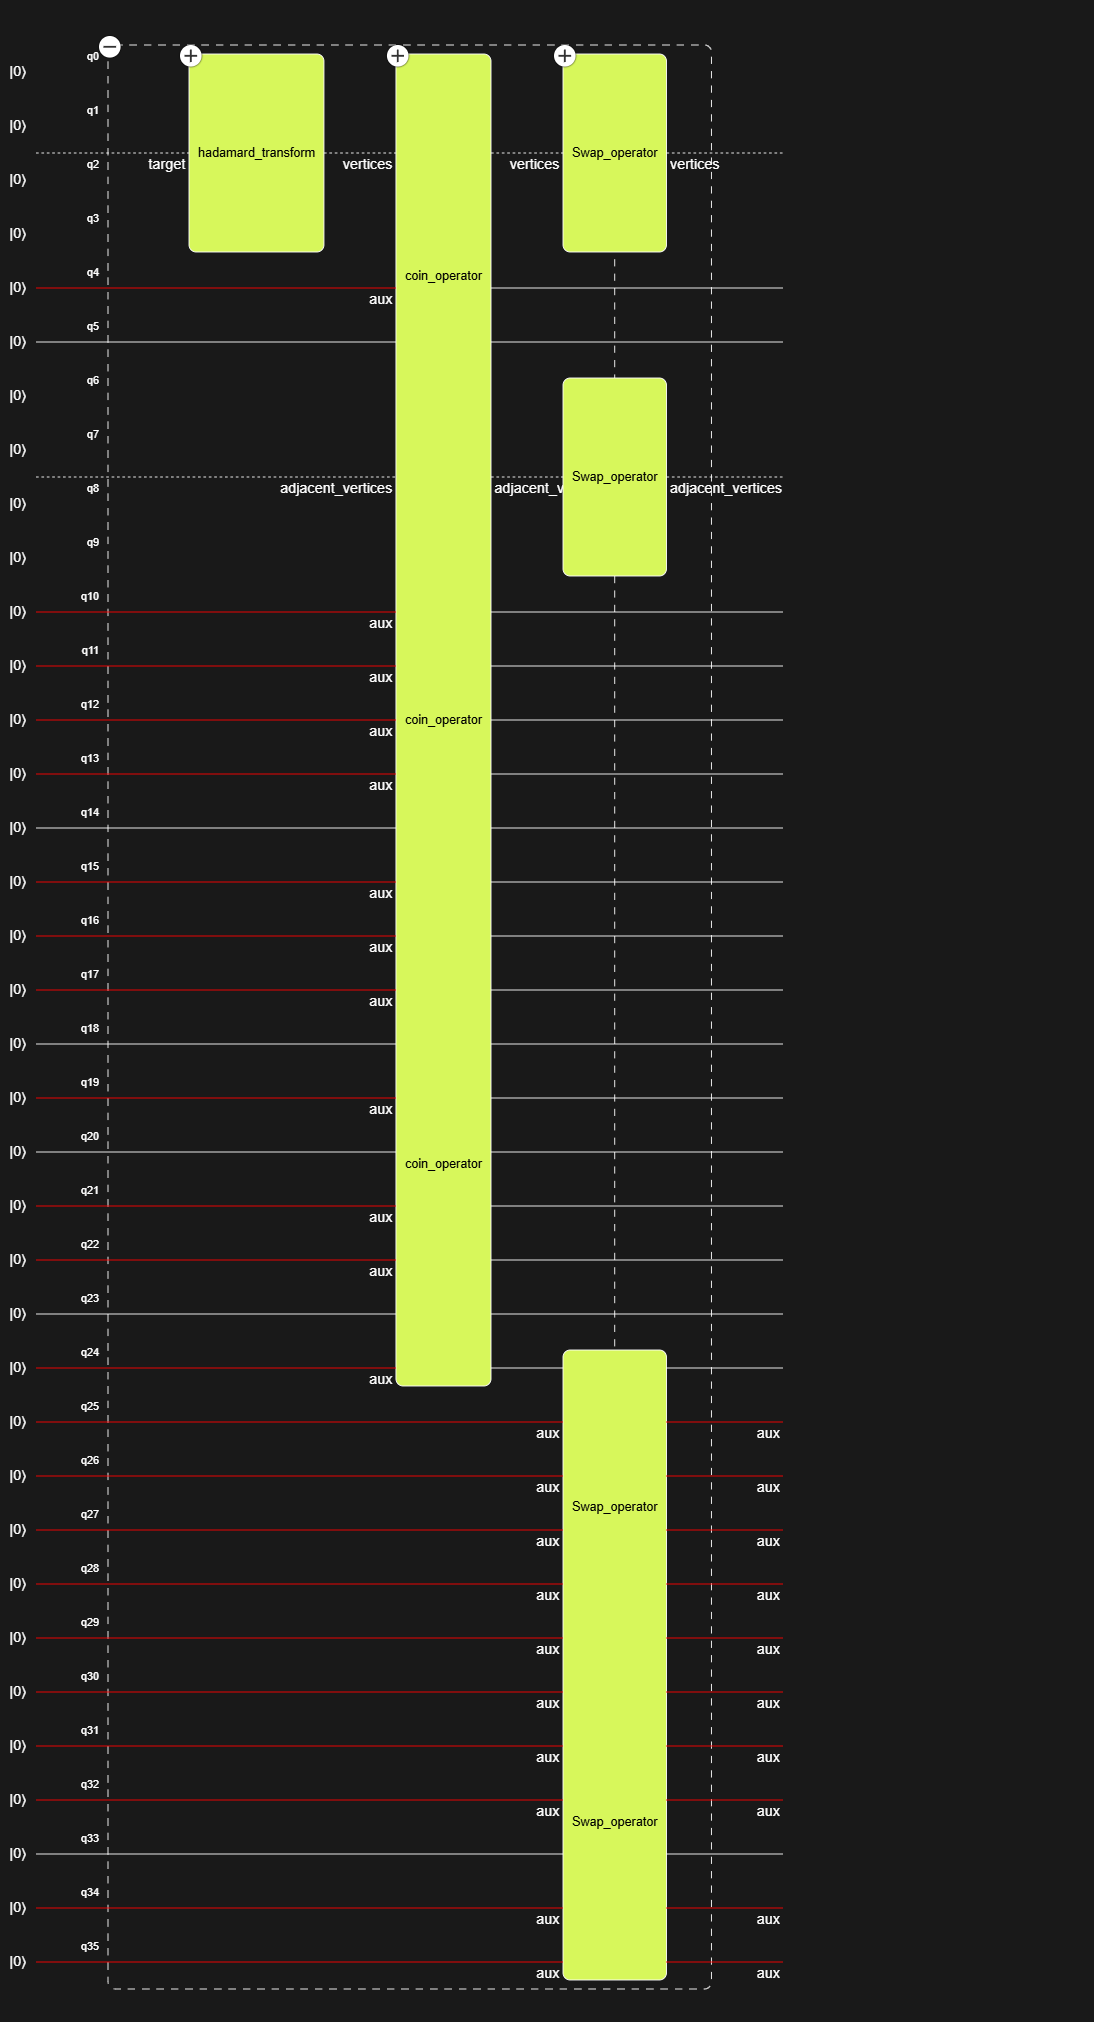

### This is the expanded image


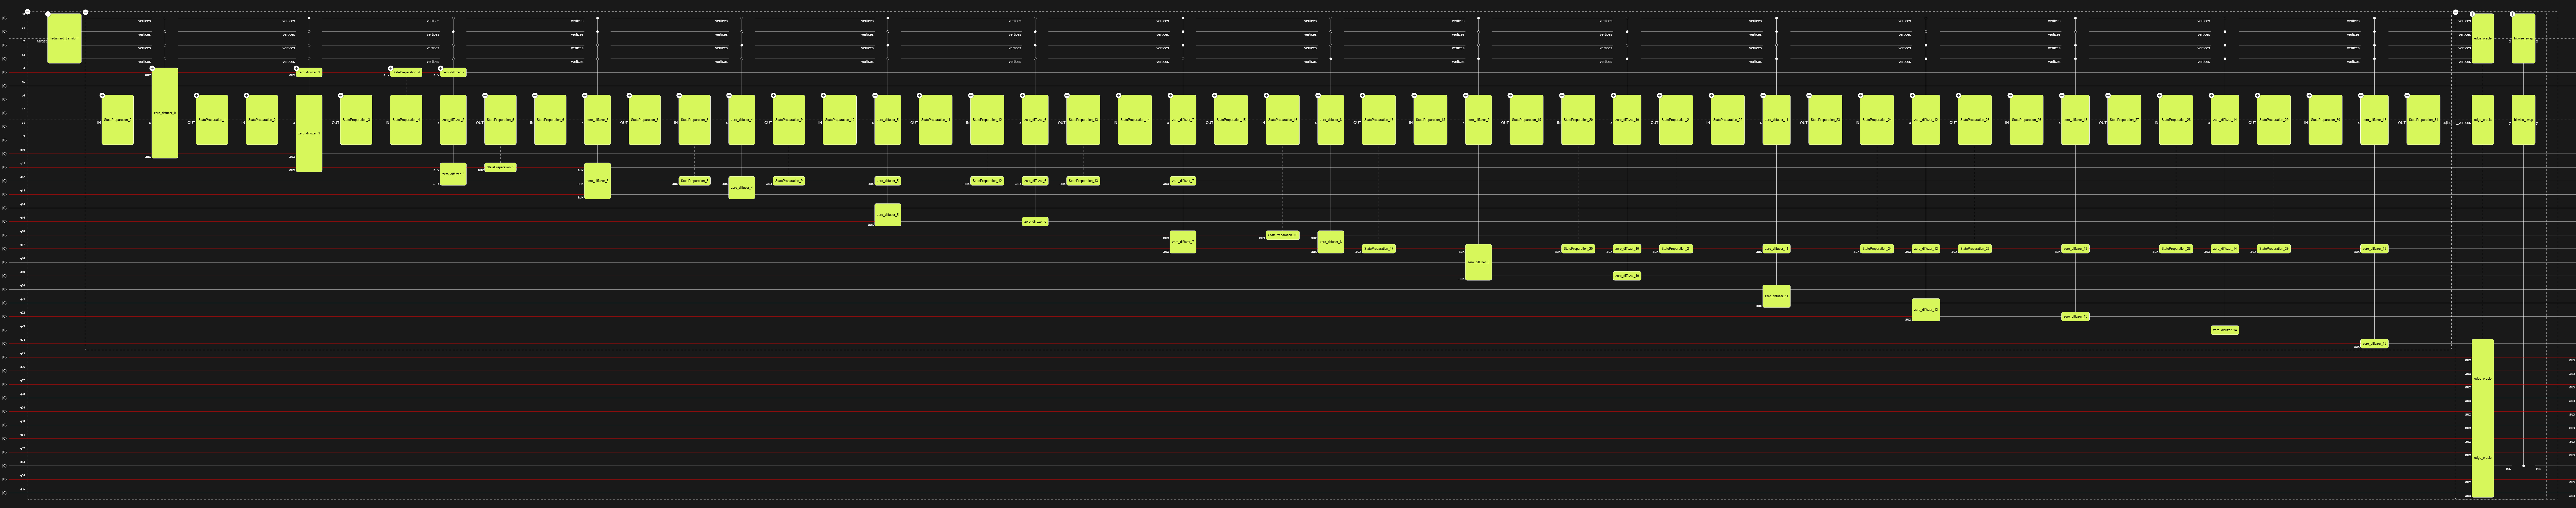

we can see each state preparations,zero diffuzer,inverse of state preparation and also edge oracle and bitwise swap operators

The coin_opeartor and Swap_operator represent these operations C and S respectively

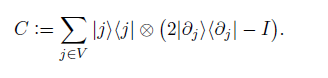  

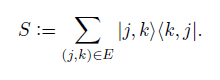